- Package (or module ;) ;) ;) ) loading :

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.datasets import Dataset

from models.linreg import LassoRegressionModel
from scripts.cross_validation import KFoldCrossValidation
import data.data_visu as viz

- Data Loading : 

In [2]:
project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')

dataset = Dataset(dir_path=data_dirname)

- Data processing : 

In [3]:
dataset.quick_preprocessing()

- Data visualization :

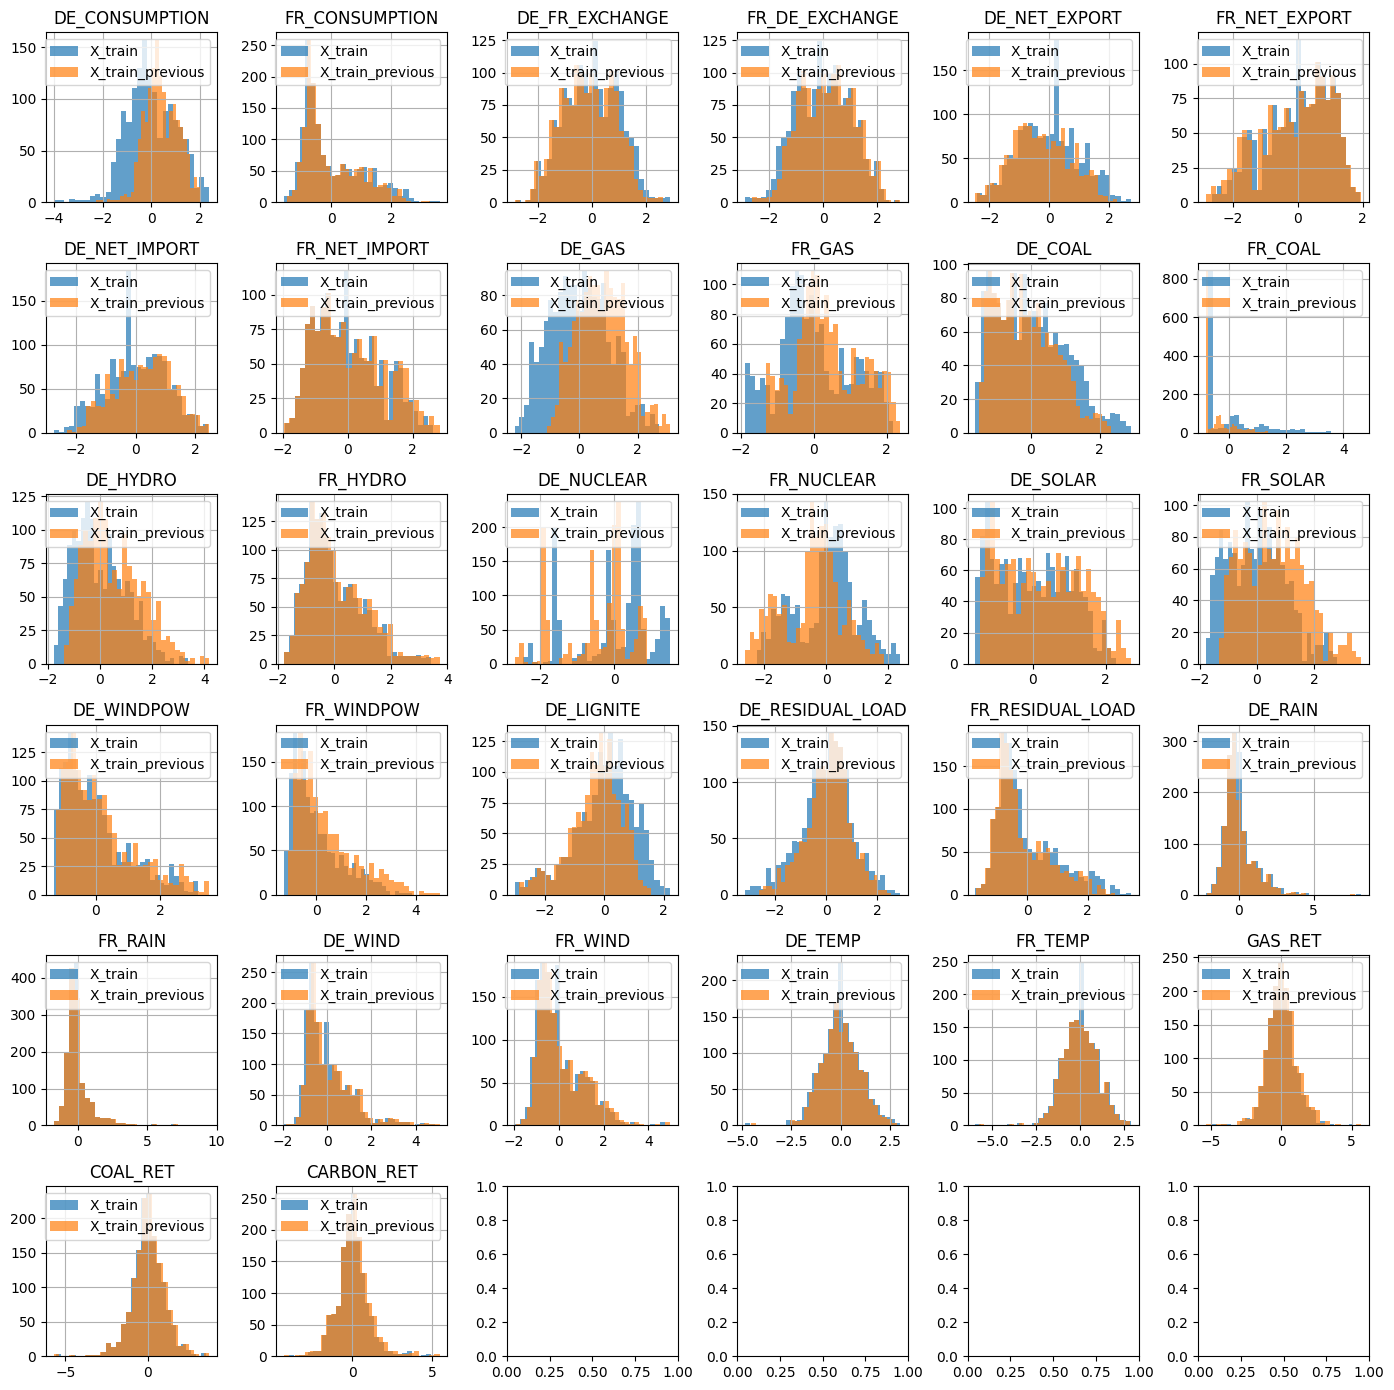

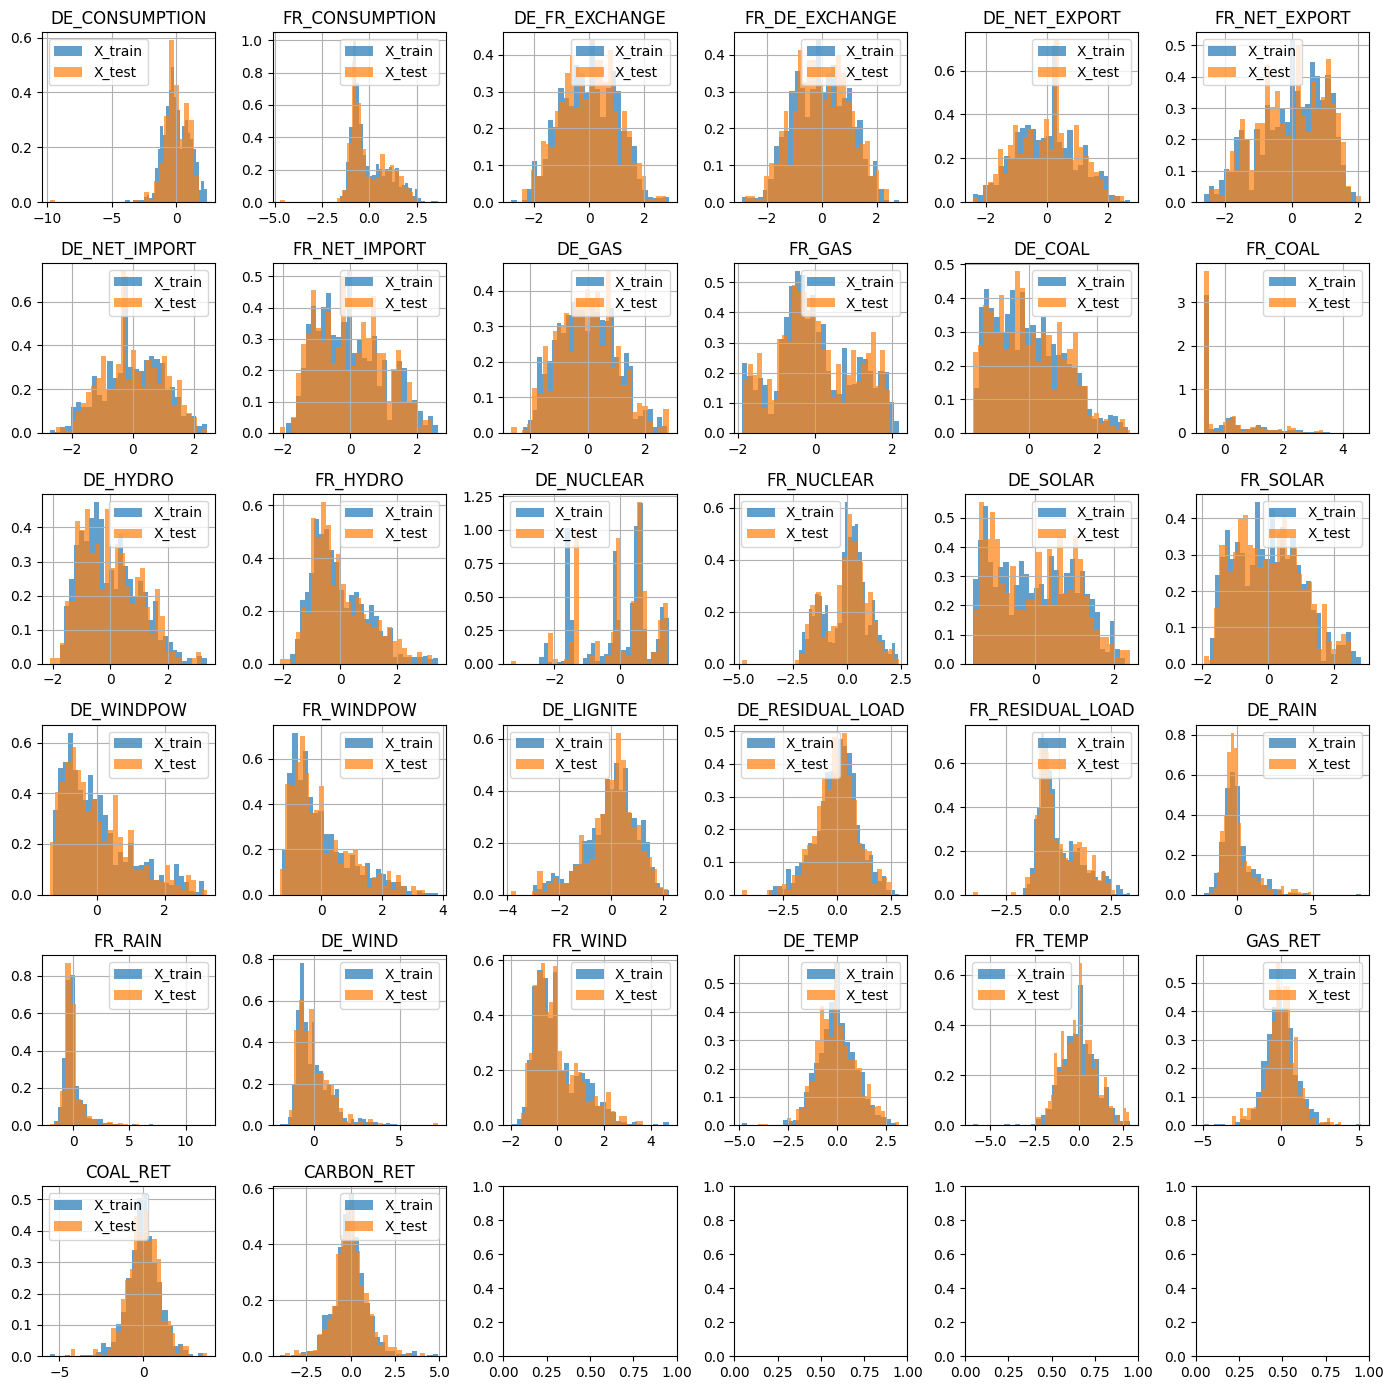

In [5]:
dataset.show_data_distribution(compare_with_previous=True)
dataset.show_data_distribution(compare_with_test=True, normalize=True)

- Model creation and training : 

In [4]:
# Model training
lr = LassoRegressionModel(alpha=0.001)
lr.fit(dataset.X_train, dataset.Y_train.TARGET)

- Model visualisation : 

(<Figure size 600x660 with 1 Axes>, <AxesSubplot: >)

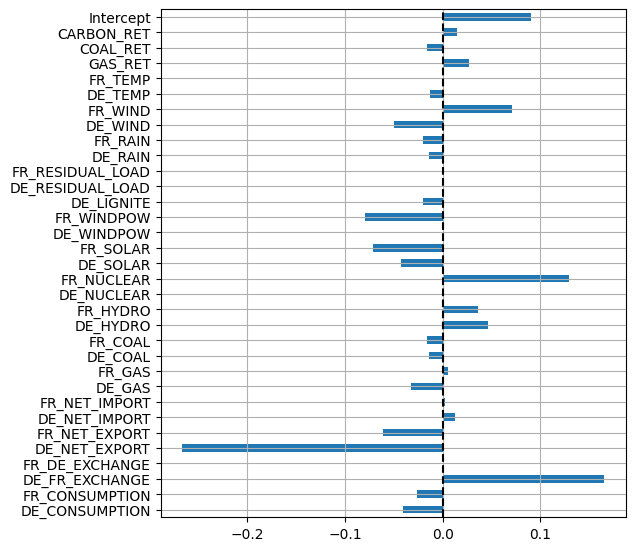

In [5]:
lr.plot_coef()

- Model evaluation : 

In [6]:
# Perform cross validation
CV = KFoldCrossValidation([lr], k = 5)
CV.run(dataset.X_train, dataset.Y_train.TARGET, verbose=False)

In [7]:
CV.scores

model,LassoReg
fold_id,
fold_0,0.287776
fold_1,0.175879
fold_2,0.205434
fold_3,0.217073
fold_4,0.151580


- Submission : 

In [ ]:
# Make a submission of tests data of dataset using model lr
y_test = lr.submit(dataset=dataset, 
          dir_name=data_dirname, 
          name="FastSub2")

- Submission visualisation

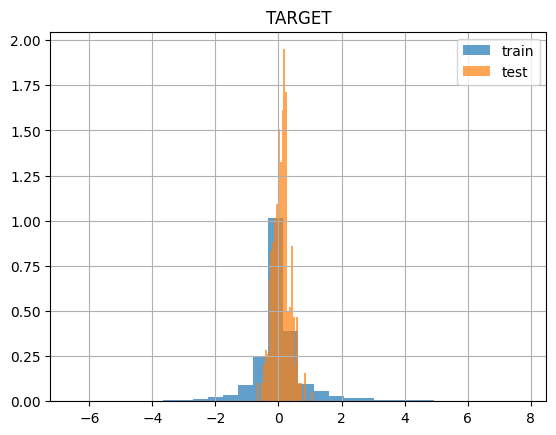

In [9]:
# Visualize target distribution
viz.show_target_distribution([dataset.Y_train, y_test],
                             ["train", "test"],
                             normalize=True)